In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from math import sqrt
from scipy.stats import t
from scipy.stats import ks_2samp

df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\music.csv')



In [2]:
pd.options.display.max_columns = None
df.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,NaN,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,classic pop and rock,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,NaN,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,NaN,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,NaN,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,uk,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,NaN,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,NaN,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
artist.hotttnesss            10000 non-null float64
artist.id                    10000 non-null object
artist.name                  10000 non-null object
artist_mbtags                3711 non-null object
artist_mbtags_count          10000 non-null float64
bars_confidence              10000 non-null float64
bars_start                   10000 non-null float64
beats_confidence             10000 non-null float64
beats_start                  10000 non-null float64
duration                     10000 non-null float64
end_of_fade_in               10000 non-null float64
familiarity                  9996 non-null float64
key                          10000 non-null float64
key_confidence               10000 non-null float64
latitude                     10000 non-null float64
location                     10000 non-null object
longitude                    10000 non-null float64
loudness      

In [4]:
print (df.isna().sum())

artist.hotttnesss               0
artist.id                       0
artist.name                     0
artist_mbtags                6289
artist_mbtags_count             0
bars_confidence                 0
bars_start                      0
beats_confidence                0
beats_start                     0
duration                        0
end_of_fade_in                  0
familiarity                     4
key                             0
key_confidence                  0
latitude                        0
location                        0
longitude                       0
loudness                        0
mode                            0
mode_confidence                 0
release.id                      0
release.name                    0
similar                         1
song.hotttnesss              4351
song.id                         0
start_of_fade_out               0
tatums_confidence               0
tatums_start                    0
tempo                           0
terms         

In [5]:
df = df.drop(['artist_mbtags'], axis=1)

In [6]:
# this will take care of all the int or float columns
df = df.fillna(df.mean()) 

# This takes care of the Nan in 'artist_mbtags'
df['similar'] = df['similar'].fillna(df['similar'].mode()[0])
df['terms'] = df['terms'].fillna(df['terms'].mode()[0])
df['title'] = df['title'].fillna(df['title'].mode()[0])



In [7]:
print (df.isna().sum())

artist.hotttnesss            0
artist.id                    0
artist.name                  0
artist_mbtags_count          0
bars_confidence              0
bars_start                   0
beats_confidence             0
beats_start                  0
duration                     0
end_of_fade_in               0
familiarity                  0
key                          0
key_confidence               0
latitude                     0
location                     0
longitude                    0
loudness                     0
mode                         0
mode_confidence              0
release.id                   0
release.name                 0
similar                      0
song.hotttnesss              0
song.id                      0
start_of_fade_out            0
tatums_confidence            0
tatums_start                 0
tempo                        0
terms                        0
terms_freq                   0
time_signature               0
time_signature_confidence    0
title   

In [8]:
df.head()

,artist.hotttnesss,artist.id,artist.name,artist_mbtags_count,bars_confidence,bars_start,beats_confidence,beats_start,duration,end_of_fade_in,familiarity,key,key_confidence,latitude,location,longitude,loudness,mode,mode_confidence,release.id,release.name,similar,song.hotttnesss,song.id,start_of_fade_out,tatums_confidence,tatums_start,tempo,terms,terms_freq,time_signature,time_signature_confidence,title,year
0,0.401998,ARD7TVE1187B99BFB1,Casual,0.0,0.643,0.58521,0.834,0.58521,218.93179,0.247,0.581794,1.0,0.736,37.157357,California - LA,-63.933358,-11.197,0,0.636,300848,Fear Itself,ARV4KO21187FB38008,0.602120,SOMZWCG12A8C13C480,218.932,0.779,0.28519,92.198,hip hop,1.000000,4.0,0.778,I Didn't Mean To,0
1,0.417500,ARMJAGH1187FB546F3,The Box Tops,1.0,0.007,0.71054,1.000,0.20627,148.03546,0.148,0.630630,6.0,0.169,35.149680,"Memphis, TN",-90.048920,-9.843,0,0.430,300822,Dimensions,ARSZWK21187B9B26D7,0.342761,SOCIWDW12A8C13D406,137.915,0.969,0.20627,121.274,blue-eyed soul,1.000000,4.0,0.384,Soul Deep,1969
2,0.343428,ARKRRTF1187B9984DA,Sonora Santanera,0.0,0.980,0.73152,0.980,0.73152,177.47546,0.282,0.487357,8.0,0.643,37.157357,Not available,-63.933358,-9.689,1,0.565,514953,Las Numero 1 De La Sonora Santanera,ARFSJUG11C8A421AAD,0.342761,SOXVLOJ12AB0189215,172.304,0.482,0.42132,100.070,salsa,1.000000,1.0,0.000,Amor De Cabaret,0
3,0.454231,AR7G5I41187FB4CE6C,Adam Ant,1.0,0.017,1.30621,0.809,0.81002,233.40363,0.000,0.630382,0.0,0.751,37.157357,"London, England",-63.933358,-9.013,1,0.749,287650,Friend Or Foe,AR4R0741187FB39AF2,0.342761,SONHOTT12A8C13493C,217.124,0.601,0.56254,119.293,pop rock,0.988584,4.0,0.000,Something Girls,1982
4,0.401724,ARXR32B1187FB57099,Gob,0.0,0.175,1.06368,0.883,0.13576,209.60608,0.066,0.651046,2.0,0.092,37.157357,Not available,-63.933358,-4.501,1,0.371,611336,Muertos Vivos,ARUA62A1187B99D9B0,0.604501,SOFSOCN12A8C143F5D,198.699,1.000,0.13576,129.738,pop punk,0.887288,4.0,0.562,Face the Ashes,2007


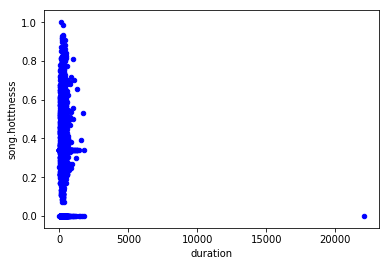

In [9]:
duration = df.groupby(['duration'])['song.hotttnesss'].mean()
duration = duration.reset_index()
duration.plot.scatter(x='duration', y='song.hotttnesss', color='blue')

In [10]:
#data for songs at 13 minutes or less
duration2 = duration[(duration<1800)]

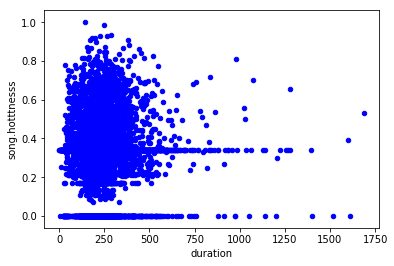

In [11]:
duration2.plot.scatter(x='duration', y='song.hotttnesss', color='blue')

In [12]:
z = np.abs(stats.zscore(df['duration']))

threshold = 3

print(np.where(z > 3))


(array([ 474, 1065, 1281, 1570, 1606, 1642, 1903, 1962, 2069, 3352, 3448,
       3862, 3930, 5294, 6257, 6348, 6672, 6833, 6883, 8016, 8401, 9014,
       9283, 9493, 9561, 9617], dtype=int64),)


In [13]:
df['duration_z_score'] = pd.DataFrame(data=z)

# Computing IQR
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
cut_num = Q1 - 1.5 * IQR
cut_num2 = Q3 + 1.5 * IQR
def cut(x, cut_num):
  cut_num = -10
  if x < cut_num: 
    x = cut_num
  else:
    x = x
  return x

df['duration'] = df['duration'].apply(lambda x: cut_num if x < cut_num else x )
df['duration'] = df['duration'].apply(lambda x: cut_num2 if x > cut_num2 else x)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= duration <= (@Q3 + 1.5 * @IQR)')

outliers1 = df.query('(@Q1 - 1.5 * @IQR) > duration ')
outliers2 = df.query('duration >(@Q3 + 1.5 * @IQR)')

print (cut_num, cut_num2)
print (outliers1['duration'].values.tolist())
print (outliers2['duration'].values.tolist())


25.51791 426.88935000000004
[]
[]


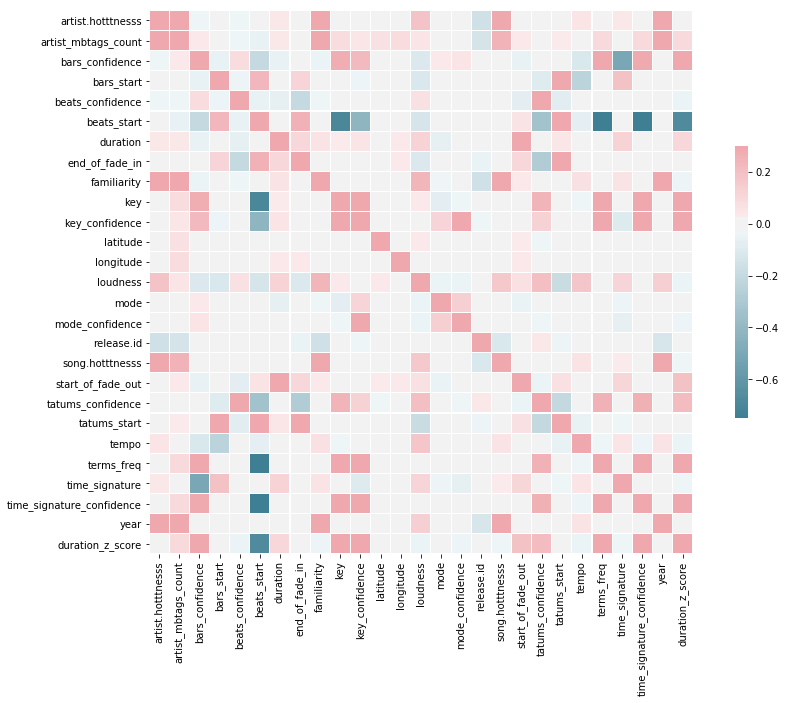

In [14]:
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df.corr()
sns.heatmap(corr, cmap = cmap, vmax=.3, center=0, square=True, linewidths=.1, cbar_kws={"shrink": .5})

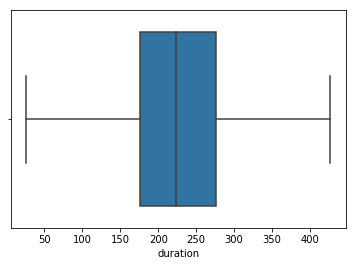

In [15]:
sns.boxplot(x=df['duration'])

   year  song.hotttnesss  artist.hotttnesss
0     0         0.284236           0.336149
1  1926         0.342761           0.382847
2  1927         0.342761           0.384586
3  1929         0.342761           0.375594
4  1930         0.342761           0.364315


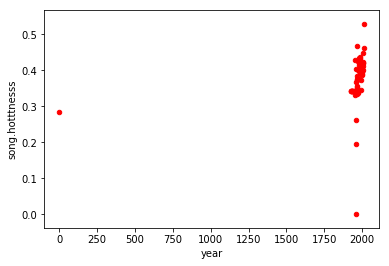

In [16]:
year = df.groupby(['year'])['song.hotttnesss', 'artist.hotttnesss'].mean()
year = year.reset_index()
year.plot.scatter(x='year', y='song.hotttnesss', color='red')

print(year.head())

   year  song.hotttnesss  artist.hotttnesss
1  1926         0.342761           0.382847
2  1927         0.342761           0.384586
3  1929         0.342761           0.375594
4  1930         0.342761           0.364315
5  1934         0.342761           0.375594


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


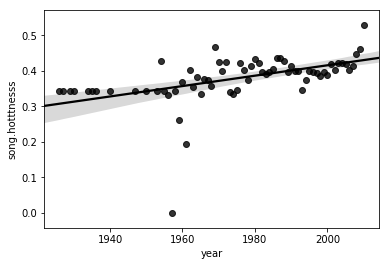

In [17]:
year2 = year[year.year > 0]

print(year2.head())
sns.regplot(x=year2['year'], y=year2['song.hotttnesss'], color='black')

In [18]:
df['year_z_score'] = pd.DataFrame(data=z)
df = df[df.year>0]

# Computing IQR
Q1 = df['year'].quantile(0.10)
Q3 = df['year'].quantile(0.60)
IQR = Q3 - Q1
cut_num = Q1 - 1.5 * IQR
cut_num2 = Q3 + 1.5 * IQR
def cut(x, cut_num):
  cut_num = -10
  if x < cut_num: 
    x = cut_num
  else:
    x = x
  return x

df['year'] = df['year'].apply(lambda x: cut_num if x < cut_num else x )
df['year'] = df['year'].apply(lambda x: cut_num2 if x > cut_num2 else x)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= year <= (@Q3 + 1.5 * @IQR)')

outliers1 = df.query('(@Q1 - 1.5 * @IQR) > year ')
outliers2 = df.query('year >(@Q3 + 1.5 * @IQR)')

print (cut_num, cut_num2)
print (outliers1['year'].values.tolist())
print (outliers2['year'].values.tolist())


1948.0 2036.0
[]
[]


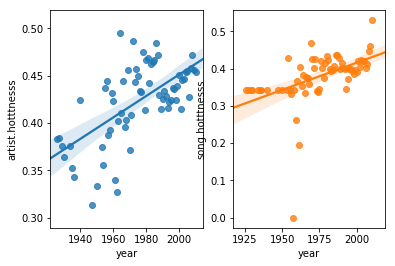

In [19]:
# multiple line plot
fig, axs = plt.subplots(ncols=2)
sns.regplot(x='year', y='artist.hotttnesss', data=year2, ax=axs[0])
sns.regplot(x='year',y='song.hotttnesss', data=year2, ax=axs[1])

In [20]:
df['key_z_score'] = pd.DataFrame(data=z)
df = df[df.key<=11]

# Computing IQR
Q1 = df['key'].quantile(0.25)
Q3 = df['key'].quantile(0.75)
IQR = Q3 - Q1
cut_num = Q1 - 1.5 * IQR
cut_num2 = Q3 + 1.5 * IQR
def cut(x, cut_num):
  cut_num = -10
  if x < cut_num: 
    x = cut_num
  else:
    x = x
  return x

df['key'] = df['key'].apply(lambda x: cut_num if x < cut_num else x )
df['key'] = df['key'].apply(lambda x: cut_num2 if x > cut_num2 else x)

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df.query('(@Q1 - 1.5 * @IQR) <= key <= (@Q3 + 1.5 * @IQR)')

outliers1 = df.query('(@Q1 - 1.5 * @IQR) > key ')
outliers2 = df.query('key >(@Q3 + 1.5 * @IQR)')

print (cut_num, cut_num2)
print (outliers1['key'].values.tolist())
print (outliers2['key'].values.tolist())


-7.0 17.0
[]
[]


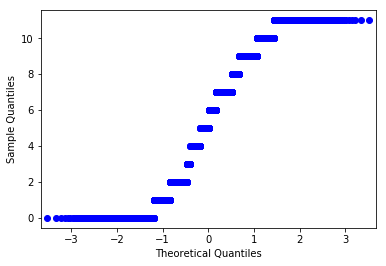

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


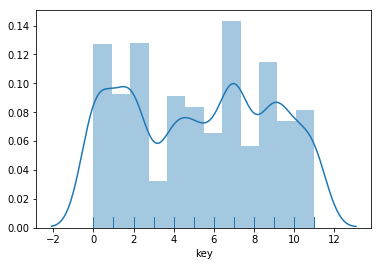

In [21]:
import statsmodels.api as sm

key = df['key']
sm.qqplot(key)
plt.show()

sns.distplot(df['key'],bins = 12, kde = True, rug = True )
plt.show()



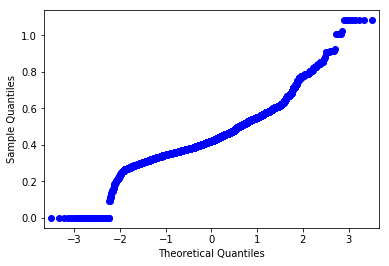

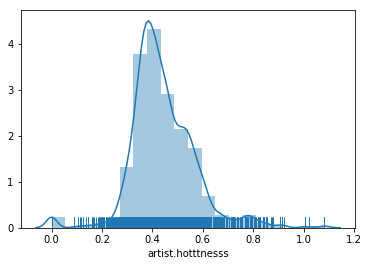

In [22]:
import scipy.stats as stats 
import statsmodels.api as sm

art_hot = df['artist.hotttnesss']
sm.qqplot(art_hot)
plt.show()

sns.distplot(df['artist.hotttnesss'],bins = 20, kde = True, rug = True )
plt.show()


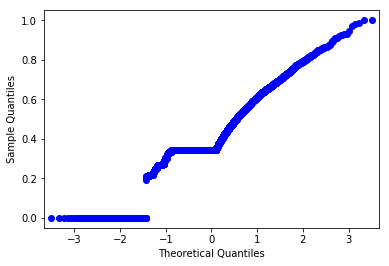

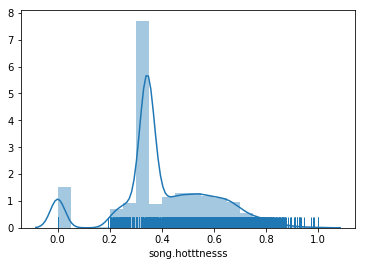

In [23]:
song_hot = df['song.hotttnesss']
sm.qqplot(song_hot)
plt.show()

sns.distplot(df['song.hotttnesss'],bins = 20, kde = True, rug = True )
plt.show()

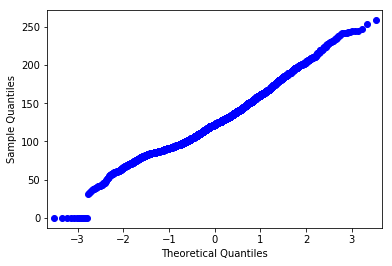

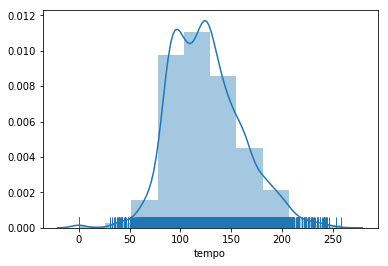

In [24]:
tempo = df['tempo']
sm.qqplot(tempo)
plt.show()

sns.distplot(df['tempo'],bins = 10, kde = True, rug = True )
plt.show()

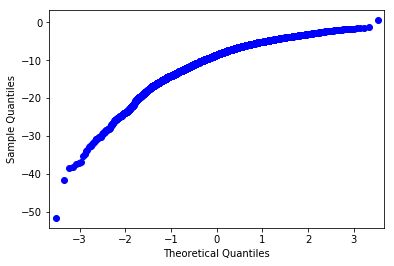

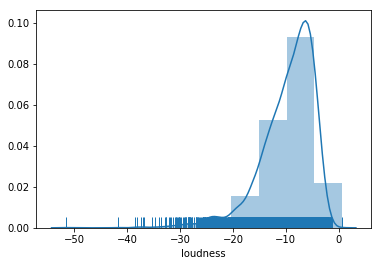

In [25]:
loudness = df['loudness']
sm.qqplot(loudness)
plt.show()

sns.distplot(df['loudness'],bins = 10, kde = True, rug = True )
plt.show()

In [26]:

print(stats.ttest_ind(df['song.hotttnesss'], df['tempo']))
print(stats.ttest_ind(df['song.hotttnesss'], df['year']))
print(stats.ttest_ind(df['song.hotttnesss'], df['loudness']))
print(stats.ttest_ind(df['song.hotttnesss'], df['duration']))



Ttest_indResult(statistic=-241.95781605509023, pvalue=0.0)
Ttest_indResult(statistic=-11942.214758281085, pvalue=0.0)
Ttest_indResult(statistic=134.34683677041846, pvalue=0.0)
Ttest_indResult(statistic=-195.03870810281109, pvalue=0.0)


In [ ]:
song_tempo = 